In [3]:
import sys
print("Python version: {}".format(sys.version))
import pandas as pd
print("pandas version: {}".format(pd.__version__))
import numpy as np
print("NumPy version: {}".format(np.__version__))
import scipy as sp
print("SciPy version: {}".format(sp.__version__))
import IPython
print("IPython version: {}".format(IPython.__version__))
import sklearn
print("scikit-learn version: {}".format(sklearn.__version__))
import matplotlib.pyplot as plt
import seaborn as sns

Python version: 3.8.16 | packaged by conda-forge | (default, Feb  1 2023, 16:05:36) 
[Clang 14.0.6 ]
pandas version: 1.5.3
NumPy version: 1.24.2
SciPy version: 1.10.0
IPython version: 8.9.0
scikit-learn version: 1.2.2


In [4]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local").appName("Breast Cancer Types for Clustering")\
      .config("spark.some.config.option", 'some-value')\
      .getOrCreate()

In [5]:
cancer=pd.read_csv('/Users/rafaelotero/Desktop/breast cancer.csv')

In [6]:
cancer.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

In [7]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [8]:
cancer=cancer.drop(['Unnamed: 32'],axis=1)

In [9]:
cancer

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0    ...        25.380          17.33           184.60      2019.0   
1    ...        24.990          23.41           158.80      1956.0   
2    ...        23.570          25.53           152.50      1709.0   
3    ...        14.910          26.50            98.87       567.7   
4    ...        22.540          16.67           152.20      1575.0   
..   ...           ...            ...              ...         ...   
564  ...        25.450          26.40           166.10      2027.0   
565  ...        23.690          38.25           155.00      1731.0   
566  ...        18.980          34.12           126.70      1124.0   
567  ...        25.740          39.42           184.60      1821.0   
568  ...         9.456          30.37            59.16       268.6   

     smoothness_worst  compactness_worst  concavity_worst  \
0             0.16220            0.66560           0.7119   
1             0.12380            0.18660           0.2416   
2             0.14440            0.42450           0.4504   
3             0.20980            0.86630           0.6869   
4             0.13740            0.20500           0.4000   
..                ...                ...              ...   
564           0.14100            0.21130           0.4107   
565           0.11660            0.19220           0.3215   
566           0.11390            0.30940           0.3403   
567           0.16500            0.86810           0.9387   
568           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
0                  0.2654          0.4601                  0.11890  
1                  0.1860          0.2750                  0.08902  
2                  0.2430          0.3613                  0.08758  
3                  0.2575          0.6638                  0.17300  
4                  0.1625          0.2364                  0.07678  
..                    ...             ...                      ...  
564                0.2216       

In [10]:
cancer.groupby('diagnosis').count()

id  radius_mean  texture_mean  perimeter_mean  area_mean  \
diagnosis                                                              
B          357          357           357             357        357   
M          212          212           212             212        212   

           smoothness_mean  compactness_mean  concavity_mean  \
diagnosis                                                      
B                      357               357             357   
M                      212               212             212   

           concave points_mean  symmetry_mean  ...  radius_worst  \
diagnosis                                      ...                 
B                          357            357  ...           357   
M                          212            212  ...           212   

           texture_worst  perimeter_worst  area_worst  smoothness_worst  \
diagnosis                                                                 
B                    357              357         357               357   
M                    212              212         212               212   

           compactness_worst  concavity_worst  concave points_worst  \
diagnosis                                                             
B                        357              357                   357   
M                        212              212                   212   

           symmetry_worst  fractal_dimension_worst  
diagnosis                                           
B                     357                      357  
M                     212                      212  

[2 rows x 31 columns]

In [11]:
cancer_M = cancer[cancer['diagnosis'] == 'M']

In [12]:
cancer_M

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
563    926125         M        20.92         25.09          143.00     1347.0   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
563          0.10990           0.22360         0.31740              0.14740   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   

     ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0    ...         25.38          17.33           184.60      2019.0   
1    ...         24.99          23.41           158.80      1956.0   
2    ...         23.57          25.53           152.50      1709.0   
3    ...         14.91          26.50            98.87       567.7   
4    ...         22.54          16.67           152.20      1575.0   
..   ...           ...            ...              ...         ...   
563  ...         24.29          29.41           179.10      1819.0   
564  ...         25.45          26.40           166.10      2027.0   
565  ...         23.69          38.25           155.00      1731.0   
566  ...         18.98          34.12           126.70      1124.0   
567  ...         25.74          39.42           184.60      1821.0   

     smoothness_worst  compactness_worst  concavity_worst  \
0              0.1622             0.6656           0.7119   
1              0.1238             0.1866           0.2416   
2              0.1444             0.4245           0.4504   
3              0.2098             0.8663           0.6869   
4              0.1374             0.2050           0.4000   
..                ...                ...              ...   
563            0.1407             0.4186           0.6599   
564            0.1410             0.2113           0.4107   
565            0.1166             0.1922           0.3215   
566            0.1139             0.3094           0.3403   
567            0.1650             0.8681           0.9387   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
0                  0.2654          0.4601                  0.11890  
1                  0.1860          0.2750                  0.08902  
2                  0.2430          0.3613                  0.08758  
3                  0.2575          0.6638                  0.17300  
4                  0.1625          0.2364                  0.07678  
..                    ...             ...                      ...  
563                0.2542       

In [13]:
# Reiniciar los índices
cancer_M = cancer_M.reset_index(drop=True)

In [14]:
cancer_M

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
207    926125         M        20.92         25.09          143.00     1347.0   
208    926424         M        21.56         22.39          142.00     1479.0   
209    926682         M        20.13         28.25          131.20     1261.0   
210    926954         M        16.60         28.08          108.30      858.1   
211    927241         M        20.60         29.33          140.10     1265.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
207          0.10990           0.22360         0.31740              0.14740   
208          0.11100           0.11590         0.24390              0.13890   
209          0.09780           0.10340         0.14400              0.09791   
210          0.08455           0.10230         0.09251              0.05302   
211          0.11780           0.27700         0.35140              0.15200   

     ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0    ...         25.38          17.33           184.60      2019.0   
1    ...         24.99          23.41           158.80      1956.0   
2    ...         23.57          25.53           152.50      1709.0   
3    ...         14.91          26.50            98.87       567.7   
4    ...         22.54          16.67           152.20      1575.0   
..   ...           ...            ...              ...         ...   
207  ...         24.29          29.41           179.10      1819.0   
208  ...         25.45          26.40           166.10      2027.0   
209  ...         23.69          38.25           155.00      1731.0   
210  ...         18.98          34.12           126.70      1124.0   
211  ...         25.74          39.42           184.60      1821.0   

     smoothness_worst  compactness_worst  concavity_worst  \
0              0.1622             0.6656           0.7119   
1              0.1238             0.1866           0.2416   
2              0.1444             0.4245           0.4504   
3              0.2098             0.8663           0.6869   
4              0.1374             0.2050           0.4000   
..                ...                ...              ...   
207            0.1407             0.4186           0.6599   
208            0.1410             0.2113           0.4107   
209            0.1166             0.1922           0.3215   
210            0.1139             0.3094           0.3403   
211            0.1650             0.8681           0.9387   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
0                  0.2654          0.4601                  0.11890  
1                  0.1860          0.2750                  0.08902  
2                  0.2430          0.3613                  0.08758  
3                  0.2575          0.6638                  0.17300  
4                  0.1625          0.2364                  0.07678  
..                    ...             ...                      ...  
207                0.2542       

In [15]:
cancer_M.groupby('diagnosis').count()

id  radius_mean  texture_mean  perimeter_mean  area_mean  \
diagnosis                                                              
M          212          212           212             212        212   

           smoothness_mean  compactness_mean  concavity_mean  \
diagnosis                                                      
M                      212               212             212   

           concave points_mean  symmetry_mean  ...  radius_worst  \
diagnosis                                      ...                 
M                          212            212  ...           212   

           texture_worst  perimeter_worst  area_worst  smoothness_worst  \
diagnosis                                                                 
M                    212              212         212               212   

           compactness_worst  concavity_worst  concave points_worst  \
diagnosis                                                             
M                        212              212                   212   

           symmetry_worst  fractal_dimension_worst  
diagnosis                                           
M                     212                      212  

[1 rows x 31 columns]

In [16]:
cancer_M.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

COGEMOS SÓLO LAS 10 PRIMERAS COLUMNAS YA QUE LAS DEMÁS SON SÓLO INFORMACIÓN ADICIONAL DE ESTAS:

In [17]:
cancer_M = cancer_M[['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
                     'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
                     'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']]

In [18]:
cancer['diagnosis'] == 'M'

0       True
1       True
2       True
3       True
4       True
       ...  
564     True
565     True
566     True
567     True
568    False
Name: diagnosis, Length: 569, dtype: bool

In [19]:
cancer_M.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      212 non-null    int64  
 1   diagnosis               212 non-null    object 
 2   radius_mean             212 non-null    float64
 3   texture_mean            212 non-null    float64
 4   perimeter_mean          212 non-null    float64
 5   area_mean               212 non-null    float64
 6   smoothness_mean         212 non-null    float64
 7   compactness_mean        212 non-null    float64
 8   concavity_mean          212 non-null    float64
 9   concave points_mean     212 non-null    float64
 10  symmetry_mean           212 non-null    float64
 11  fractal_dimension_mean  212 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 20.0+ KB


In [20]:
cancer_Mp=cancer_M.drop(['id','diagnosis'],axis=1)

In [21]:
cancer_M.count()

id                        212
diagnosis                 212
radius_mean               212
texture_mean              212
perimeter_mean            212
area_mean                 212
smoothness_mean           212
compactness_mean          212
concavity_mean            212
concave points_mean       212
symmetry_mean             212
fractal_dimension_mean    212
dtype: int64

In [22]:
cols=cancer_Mp.columns

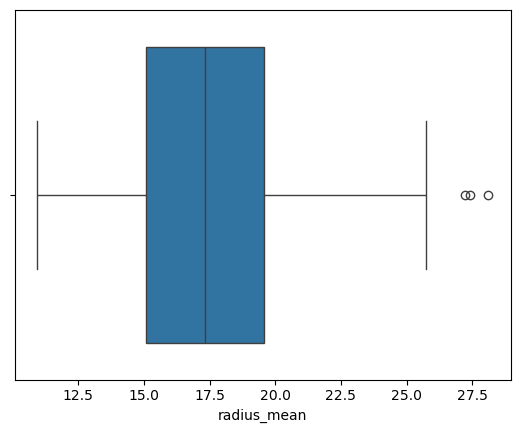

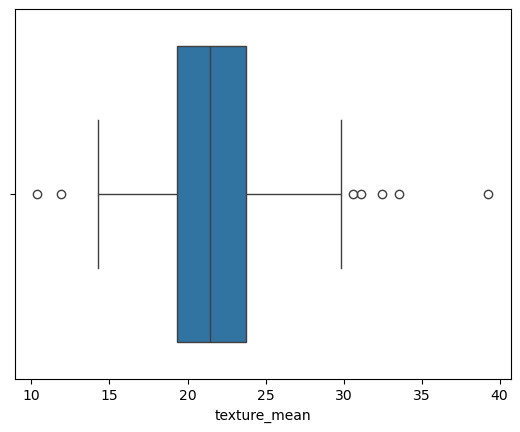

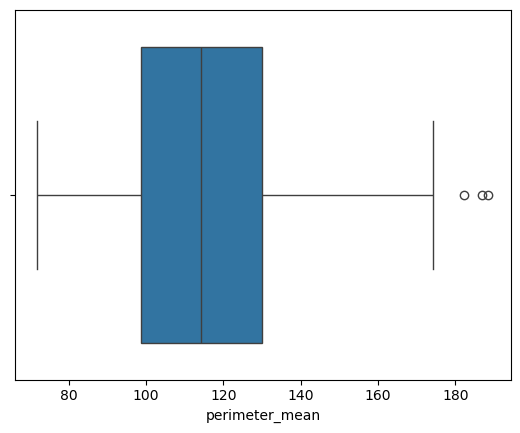

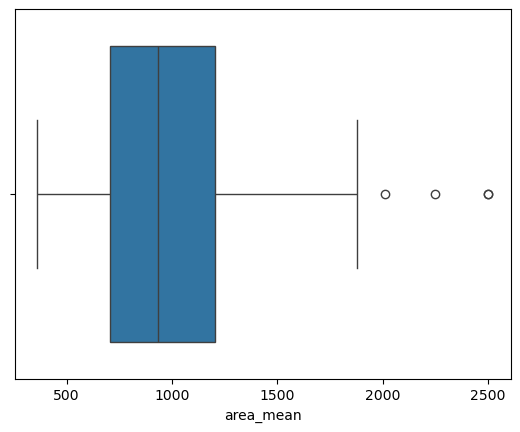

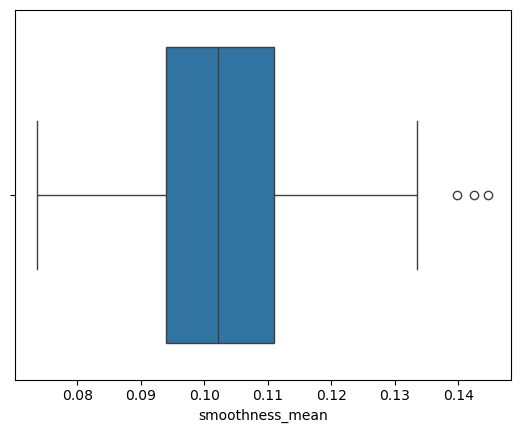

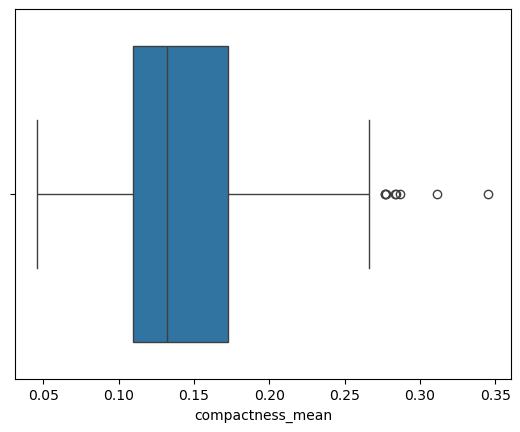

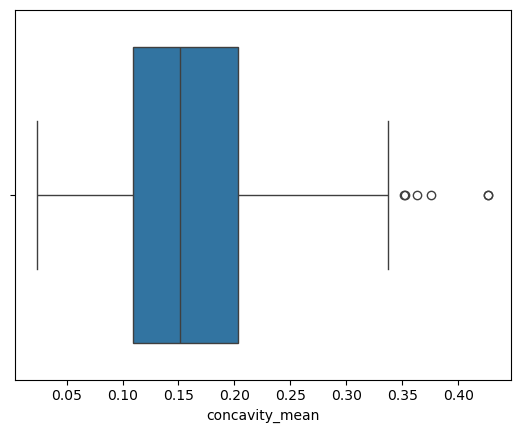

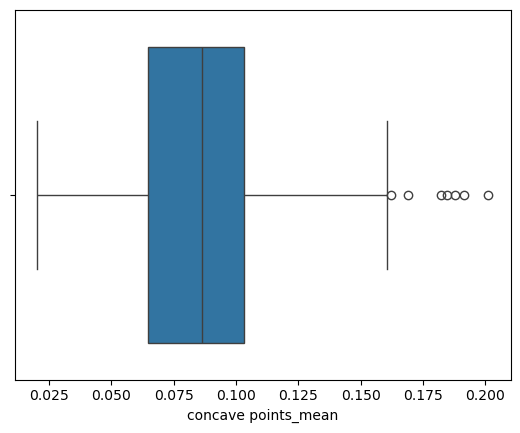

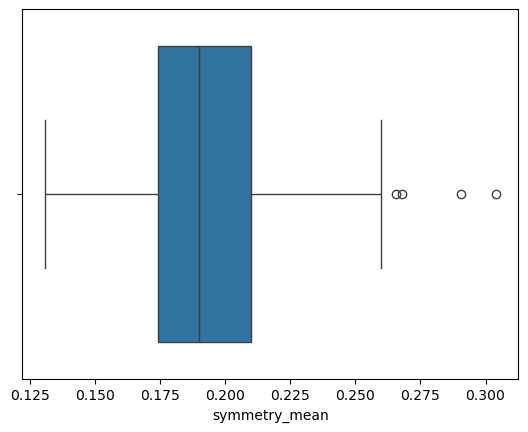

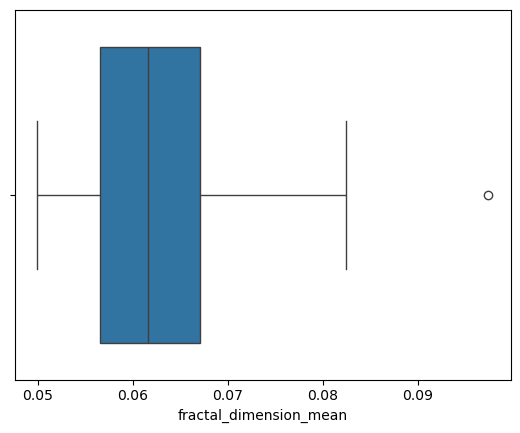

In [23]:
for col in cols:
    sns.boxplot(x = cancer_Mp[col])
    plt.show()

Ajustamos Outliers de nuestros datos:

In [24]:
def No_outliers(df, cols):
    for col in cols:
        
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        
        IQR = Q3-Q1
        limite_bajo  = Q1 - 1.5 * IQR
        limite_alto = Q3 + 1.5 * IQR
        
        df[col] = np.where((df[col] > limite_alto), limite_alto, 
                                  np.where((df[col] < limite_bajo), limite_bajo, df[col]))

In [25]:
No_outliers(cancer_Mp,cols)

Veamos si hemos corregido los Outliers:

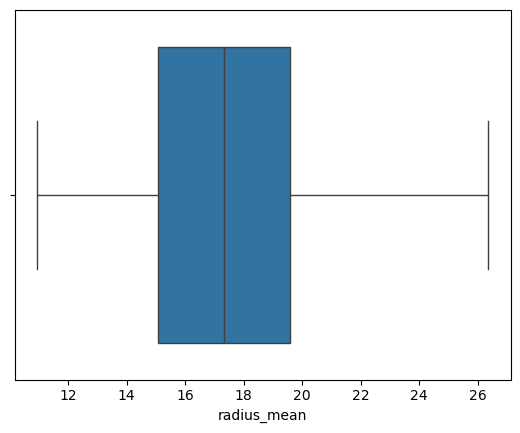

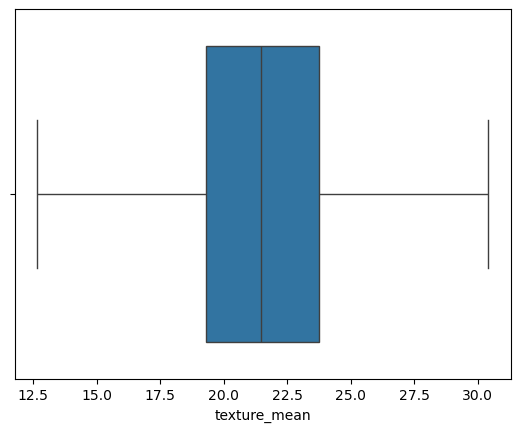

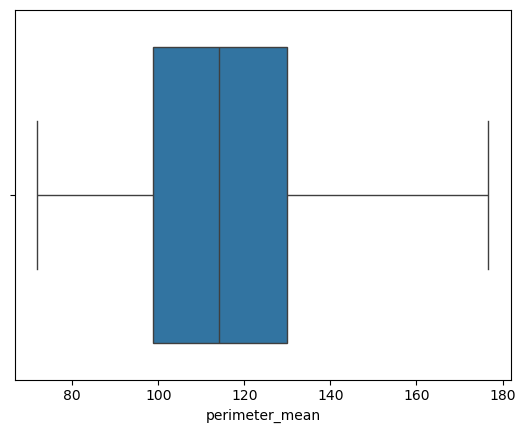

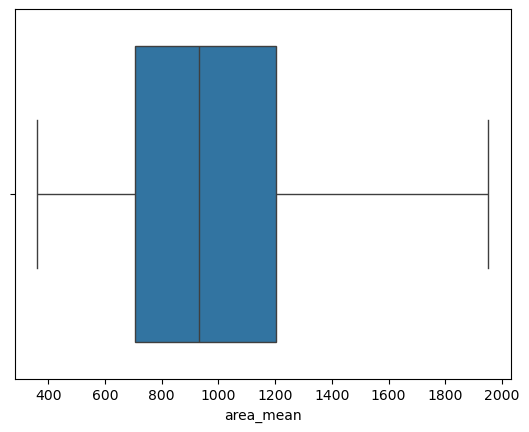

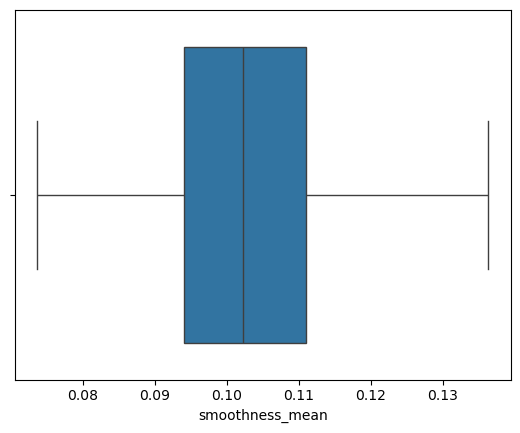

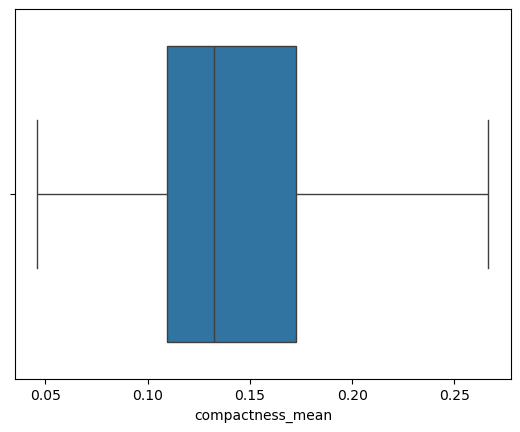

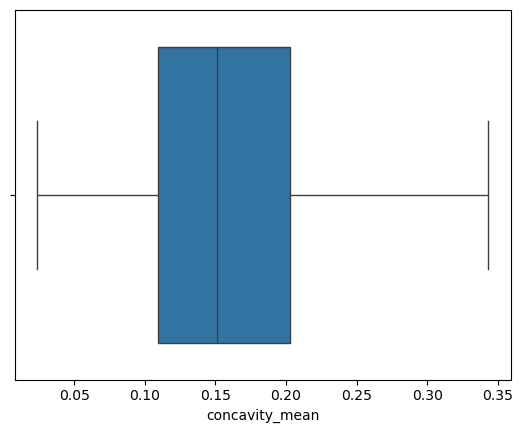

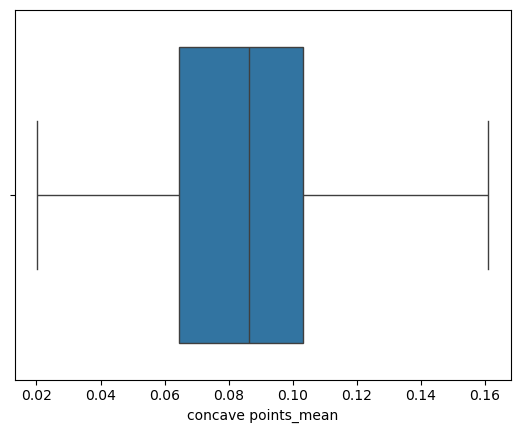

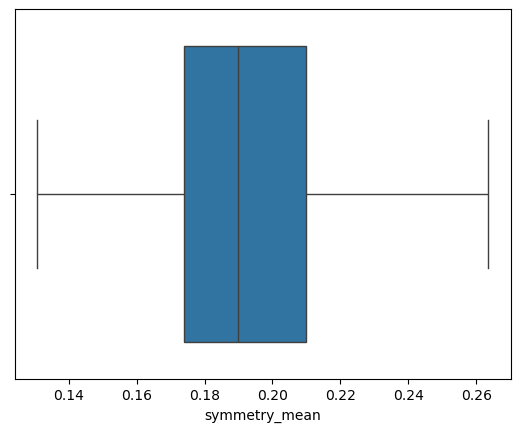

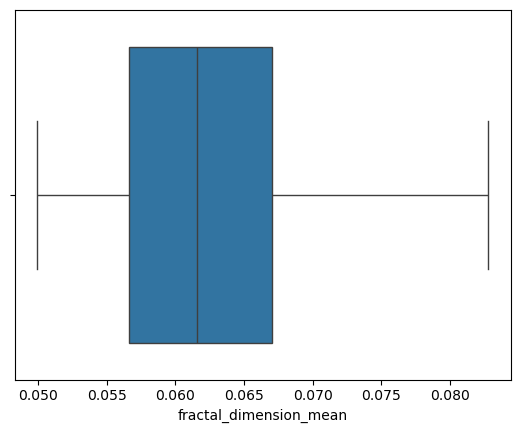

In [26]:
for col in cols:
    sns.boxplot(x = cancer_Mp[col])
    plt.show()

Vamos a aplicar PCA para visualizar nuestros datos. A partir de ahora todo con Pyspark.

In [27]:
# Convertir el DataFrame de pandas a DataFrame de Spark
cancer_Mspark = spark.createDataFrame(cancer_Mp)

# Mostrar el DataFrame de Spark
cancer_Mspark.show()

+-----------+------------+--------------+---------+---------------+----------------+--------------+-------------------+-------------+----------------------+
|radius_mean|texture_mean|perimeter_mean|area_mean|smoothness_mean|compactness_mean|concavity_mean|concave points_mean|symmetry_mean|fractal_dimension_mean|
+-----------+------------+--------------+---------+---------------+----------------+--------------+-------------------+-------------+----------------------+
|      17.99|    12.67125|         122.8|   1001.0|         0.1184|          0.2666|        0.3001|             0.1471|       0.2419|               0.07871|
|      20.57|       17.77|         132.9|   1326.0|        0.08474|         0.07864|        0.0869|            0.07017|       0.1812|               0.05667|
|      19.69|       21.25|         130.0|   1203.0|         0.1096|          0.1599|        0.1974|             0.1279|       0.2069|               0.05999|
|      11.42|       20.38|         77.58|    386.1|      0

In [28]:
cancer_Mspark.summary().show()

24/01/23 12:17:30 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+-------+------------------+------------------+------------------+------------------+--------------------+--------------------+-------------------+--------------------+--------------------+----------------------+
|summary|       radius_mean|      texture_mean|    perimeter_mean|         area_mean|     smoothness_mean|    compactness_mean|     concavity_mean| concave points_mean|       symmetry_mean|fractal_dimension_mean|
+-------+------------------+------------------+------------------+------------------+--------------------+--------------------+-------------------+--------------------+--------------------+----------------------+
|  count|               212|               212|               212|               212|                 212|                 212|                212|                 212|                 212|                   212|
|   mean| 17.44555424528302|21.548909198113204|115.23606132075476| 971.5165094339623|  0.1028130778301887| 0.14420099056603772|0.15966257075471704| 

In [29]:
# Para aplicar un modelo de Spark debemos vectorizar nuestros datos para cada punto.

from pyspark.ml.feature import VectorAssembler
assembler = VectorAssembler(inputCols=cancer_Mspark.columns,outputCol="features")
cancer_Mspark = assembler.transform(cancer_Mspark)
cancer_Mspark.show()

+-----------+------------+--------------+---------+---------------+----------------+--------------+-------------------+-------------+----------------------+--------------------+
|radius_mean|texture_mean|perimeter_mean|area_mean|smoothness_mean|compactness_mean|concavity_mean|concave points_mean|symmetry_mean|fractal_dimension_mean|            features|
+-----------+------------+--------------+---------+---------------+----------------+--------------+-------------------+-------------+----------------------+--------------------+
|      17.99|    12.67125|         122.8|   1001.0|         0.1184|          0.2666|        0.3001|             0.1471|       0.2419|               0.07871|[17.99,12.67125,1...|
|      20.57|       17.77|         132.9|   1326.0|        0.08474|         0.07864|        0.0869|            0.07017|       0.1812|               0.05667|[20.57,17.77,132....|
|      19.69|       21.25|         130.0|   1203.0|         0.1096|          0.1599|        0.1974|           

In [30]:
# Aplicamos el método StandardScaler para escalar nuestros datos y dejarlos con media nula y varianza la unidad.
from pyspark.ml.feature import StandardScaler

scaler = StandardScaler(inputCol="features", outputCol="scaledFeatures",
                        withStd=True, withMean=True)  #Marcamos withMean=True para que nos escale los datos con media nula.

scalerModel = scaler.fit(cancer_Mspark)
cancer_Mspark_scaled = scalerModel.transform(cancer_Mspark)
cancer_Mspark_scaled.show()

+-----------+------------+--------------+---------+---------------+----------------+--------------+-------------------+-------------+----------------------+--------------------+--------------------+
|radius_mean|texture_mean|perimeter_mean|area_mean|smoothness_mean|compactness_mean|concavity_mean|concave points_mean|symmetry_mean|fractal_dimension_mean|            features|      scaledFeatures|
+-----------+------------+--------------+---------+---------------+----------------+--------------+-------------------+-------------+----------------------+--------------------+--------------------+
|      17.99|    12.67125|         122.8|   1001.0|         0.1184|          0.2666|        0.3001|             0.1471|       0.2419|               0.07871|[17.99,12.67125,1...|[0.17274927940876...|
|      20.57|       17.77|         132.9|   1326.0|        0.08474|         0.07864|        0.0869|            0.07017|       0.1812|               0.05667|[20.57,17.77,132....|[0.99136736397126...|
|    

In [31]:
# Ya que no conocemos si nuestros datos provienen de una distribución normal, es conviente utilizar el escalado MinMaxScaler.
from pyspark.ml.feature import MinMaxScaler

scalermM = MinMaxScaler(inputCol="features", outputCol="scaledminMaxFeatures")

# Compute summary statistics and generate MinMaxScalerModel
scalermMModel = scalermM.fit(cancer_Mspark_scaled)

# rescale each feature to range [min, max].
cancer_Mspark_scaled = scalermMModel.transform(cancer_Mspark_scaled)
cancer_Mspark_scaled.show()

+-----------+------------+--------------+---------+---------------+----------------+--------------+-------------------+-------------+----------------------+--------------------+--------------------+--------------------+
|radius_mean|texture_mean|perimeter_mean|area_mean|smoothness_mean|compactness_mean|concavity_mean|concave points_mean|symmetry_mean|fractal_dimension_mean|            features|      scaledFeatures|scaledminMaxFeatures|
+-----------+------------+--------------+---------+---------------+----------------+--------------+-------------------+-------------+----------------------+--------------------+--------------------+--------------------+
|      17.99|    12.67125|         122.8|   1001.0|         0.1184|          0.2666|        0.3001|             0.1471|       0.2419|               0.07871|[17.99,12.67125,1...|[0.17274927940876...|[0.45677210056772...|
|      20.57|       17.77|         132.9|   1326.0|        0.08474|         0.07864|        0.0869|            0.07017| 

Ahora, por fin, sí aplicamos PCA:

In [32]:
from pyspark.ml.feature import PCA

pca = PCA(k=2, inputCol="scaledminMaxFeatures", outputCol="pcaFeatures")
pcamodel = pca.fit(cancer_Mspark_scaled)
cancer_Mpca_spark = pcamodel.transform(cancer_Mspark_scaled).select('pcaFeatures')

24/01/23 12:17:40 WARN InstanceBuilder: Failed to load implementation from:dev.ludovic.netlib.blas.JNIBLAS
24/01/23 12:17:40 WARN InstanceBuilder: Failed to load implementation from:dev.ludovic.netlib.lapack.JNILAPACK


In [33]:
cancer_Mpca_spark.show(truncate=False)

+-------------------------------------------+
|pcaFeatures                                |
+-------------------------------------------+
|[-2.176874087496677,-0.5471939360776211]   |
|[-1.0004680716037042,0.49585286251597865]  |
|[-1.6372399601625847,0.13828701333262358]  |
|[-1.7555336206494427,-1.226720473335884]   |
|[-1.4450532986630213,0.3043957510463312]   |
|[-1.2402159578023615,-0.8185855826099259]  |
|[-1.028592346907134,0.22235623046853314]   |
|[-1.107364003920034,-0.6557580974327248]   |
|[-1.4368664229842774,-0.7909002096737849]  |
|[-1.4961209169117242,-0.8971282939428243]  |
|[-0.4744420839180219,0.21159718090507057]  |
|[-0.9297038139438463,-0.08198697052996262] |
|[-1.875597256373194,-0.25252365225156714]  |
|[-0.7422670670966347,0.14665191332034055]  |
|[-1.4499507643528797,-0.6935778518998565]  |
|[-1.2743635777352273,-0.49776925291539925] |
|[-0.6324936865961867,-0.028949844875054004]|
|[-1.5430483811702684,-0.46556201677109527] |
|[-1.1869290128019667,0.4643145554

In [34]:
column_names=['Primera_componente','Segunda_Componente']
##ESTO ES PARA CONVERTIR EL VECTOR DENSE (DONDE SE HA ALMACENADO LAS COMPONENTES DE SPARK EN UN DATAFRAME)
cancer_Mpca = cancer_Mpca_spark.rdd.map(lambda x:[float(y) for y in x['pcaFeatures']]).toDF(column_names)

In [35]:
cancer_Mpca.show()

+-------------------+--------------------+
| Primera_componente|  Segunda_Componente|
+-------------------+--------------------+
| -2.176874087496677| -0.5471939360776211|
|-1.0004680716037042| 0.49585286251597865|
|-1.6372399601625847| 0.13828701333262358|
|-1.7555336206494427|  -1.226720473335884|
|-1.4450532986630213|  0.3043957510463312|
|-1.2402159578023615| -0.8185855826099259|
| -1.028592346907134| 0.22235623046853314|
| -1.107364003920034| -0.6557580974327248|
|-1.4368664229842774| -0.7909002096737849|
|-1.4961209169117242| -0.8971282939428243|
|-0.4744420839180219| 0.21159718090507057|
|-0.9297038139438463|-0.08198697052996262|
| -1.875597256373194|-0.25252365225156714|
|-0.7422670670966347| 0.14665191332034055|
|-1.4499507643528797| -0.6935778518998565|
|-1.2743635777352273|-0.49776925291539925|
|-0.6324936865961867|-0.02894984487505...|
|-1.5430483811702684|-0.46556201677109527|
|-1.1869290128019667|  0.4643145554912001|
|-1.5476836645945153|  -0.565411667053306|
+----------

In [36]:
cancer_Mpca = cancer_Mpca.toPandas()

In [37]:
cancer_Mpca.head()

Primera_componente  Segunda_Componente
0           -2.176874           -0.547194
1           -1.000468            0.495853
2           -1.637240            0.138287
3           -1.755534           -1.226720
4           -1.445053            0.304396

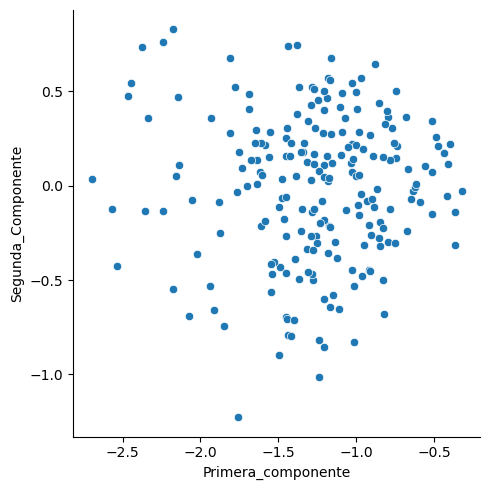

In [38]:
# Crear el gráfico relacional con colores específicos para cada label
sns.relplot(data=cancer_Mpca, x="Primera_componente", y="Segunda_Componente")

plt.show()

In [39]:
pcamodel.explainedVariance

DenseVector([0.486, 0.3343])

In [40]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator

# MÉTODO DE ELBOW CON PYSPARK
cost =[]

for i in range(2,15):
    kmeans = KMeans(featuresCol='scaledminMaxFeatures',k=i)
    kmeansmodel = kmeans.fit(cancer_Mspark_scaled)
    summary = kmeansmodel.summary
    cost.append(summary.trainingCost)

In [41]:
cost

[67.38395776750681,
 49.77707967190183,
 41.08849562183421,
 37.46734665717573,
 33.84594002454394,
 31.98389066983438,
 29.234555023283658,
 27.32950146700899,
 25.355117562040704,
 24.733793157510657,
 24.06265357051484,
 22.019112849545696,
 21.258181541714997]

In [42]:
num_clusters = list(range(2, 15))
num_clusters

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

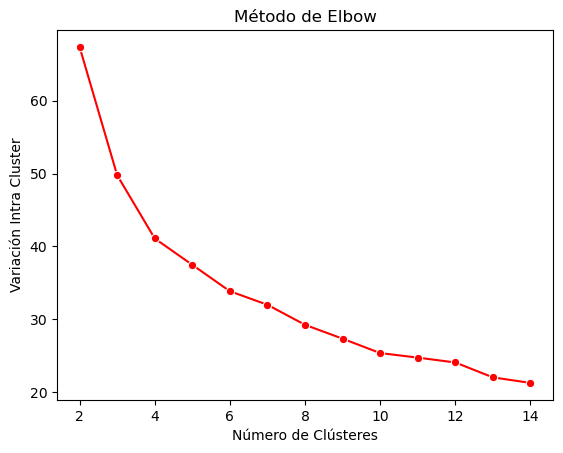

In [43]:
# Utiliza sns.lineplot() con un solo argumento para los datos y utiliza range(2, 15) para el eje x
sns.lineplot(x=list(range(2, 15)), y=cost, marker='o', color='red')

plt.title('Método de Elbow')
plt.xlabel('Número de Clústeres')
plt.ylabel('Variación Intra Cluster')

plt.savefig('/Users/rafaelotero/Desktop/Images')
plt.show()

In [44]:
sil_evaluador=[]
for i in range(2,15):
    kmeans = KMeans(featuresCol='scaledminMaxFeatures',k=i)
    kmeansmodel = kmeans.fit(cancer_Mspark_scaled)
    evaluator = ClusteringEvaluator(featuresCol='scaledminMaxFeatures', predictionCol='prediction')
    silhouette = evaluator.evaluate(kmeansmodel.transform(cancer_Mspark_scaled))
    sil_evaluador.append(silhouette)

In [45]:
sil_evaluador

[0.4227360929496768,
 0.4606801702011549,
 0.42476889669169765,
 0.3631994089902195,
 0.3376054563417481,
 0.3100346901035919,
 0.33144550178949383,
 0.3184085396666147,
 0.33982844462804646,
 0.2964450343927663,
 0.2913612960831904,
 0.31633402464363186,
 0.3237206005270345]

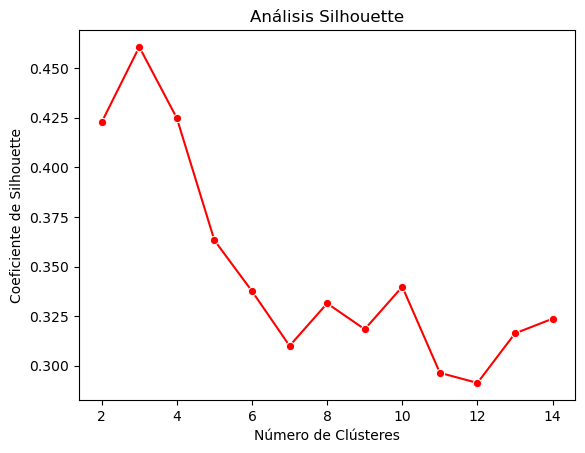

In [46]:
# Utiliza sns.lineplot() con un solo argumento para los datos y utiliza range(2, 15) para el eje x
sns.lineplot(x=list(range(2, 15)), y=sil_evaluador, marker='o', color='red')

plt.title('Análisis Silhouette')
plt.xlabel('Número de Clústeres')
plt.ylabel('Coeficiente de Silhouette')
plt.show()

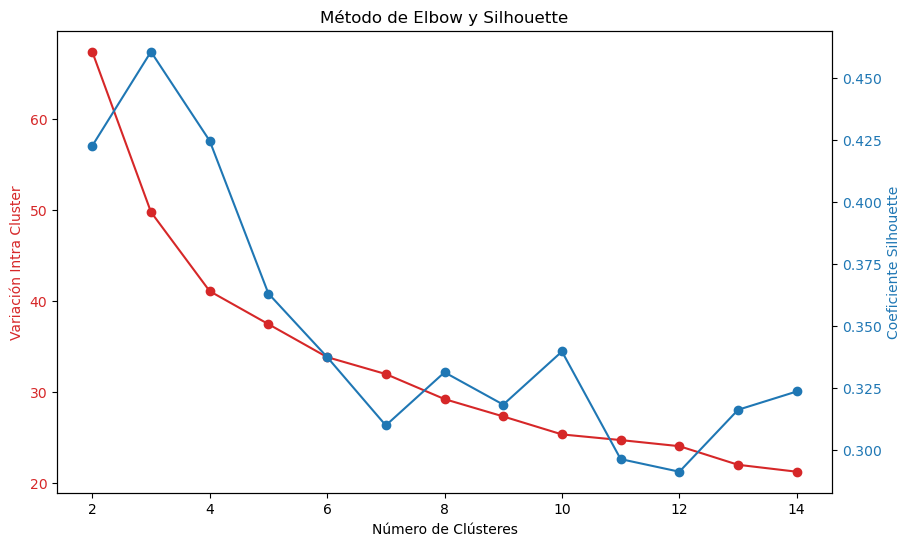

In [98]:
# Configuración de la gráfica
fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:red'
ax1.set_xlabel('Número de Clústeres')
ax1.set_ylabel('Variación Intra Cluster', color=color)
ax1.plot(num_clusters, cost, marker='o', color=color, label='Método de Elbow')
ax1.tick_params(axis='y', labelcolor=color)

# Crea un segundo eje y compartiendo el mismo eje x
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Coeficiente Silhouette', color=color)
ax2.plot(num_clusters, sil_evaluador, marker='o', color=color, label='Silhouette')
ax2.tick_params(axis='y', labelcolor=color)

# Ajustes de diseño
plt.title('Método de Elbow y Silhouette')

# Muestra la gráfica
plt.savefig('/Users/rafaelotero/Desktop/elbowsil')
plt.show()

Habiendo observado el valor de estas dos gráficas, vamos a tomar 4 clústeres.

In [48]:
# Trains a k-means model.
kmeans = KMeans(featuresCol='scaledminMaxFeatures',k=4, predictionCol='cluster_km')
kmeansmodel = kmeans.fit(cancer_Mspark_scaled)

# Make predictions
kmeanspredictions = kmeansmodel.transform(cancer_Mspark_scaled)

# Evaluate clustering by computing Silhouette score
evaluator = ClusteringEvaluator(featuresCol='scaledminMaxFeatures', predictionCol='cluster_km')

silhouette = evaluator.evaluate(kmeanspredictions)
print("Silhouette with squared euclidean distance = " + str(silhouette))

Silhouette with squared euclidean distance = 0.42476889669169765


In [49]:
kmeanspredictions.groupBy('cluster_km').count().show()

+----------+-----+
|cluster_km|count|
+----------+-----+
|         1|   22|
|         3|   58|
|         2|   60|
|         0|   72|
+----------+-----+



In [50]:
#Añadimos nuestras predicciones de kmeans al dataset customer que teníamos antes
cancer_Mkmeanspredictions = kmeanspredictions.toPandas()
cancer_Mkmeans = pd.concat([cancer_Mpca, cancer_Mkmeanspredictions[['cluster_km']]], axis=1)

In [51]:
cancer_Mkmeans

Primera_componente  Segunda_Componente  cluster_km
0             -2.176874           -0.547194           1
1             -1.000468            0.495853           0
2             -1.637240            0.138287           0
3             -1.755534           -1.226720           3
4             -1.445053            0.304396           0
..                  ...                 ...         ...
207           -2.154586            0.049567           1
208           -1.689153            0.484589           0
209           -1.247727            0.452977           0
210           -0.754247            0.229118           2
211           -2.353693           -0.135755           1

[212 rows x 3 columns]

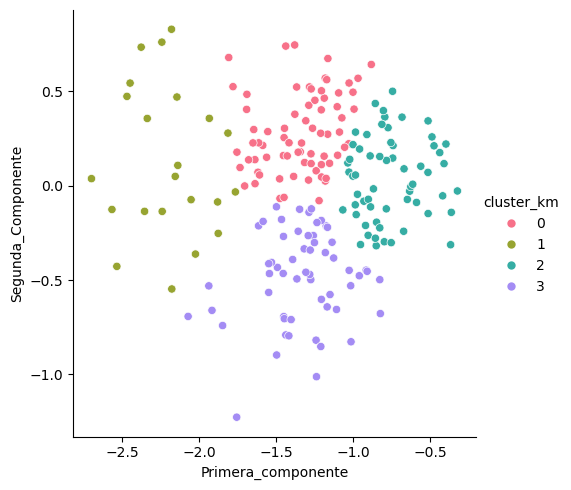

In [52]:
# Definir una paleta de colores para los 4 labels
palette = sns.color_palette("husl", 4)

# Crear el gráfico relacional con colores específicos para cada label
sns.relplot(data=cancer_Mkmeans, x="Primera_componente", y="Segunda_Componente", hue="cluster_km", palette=palette)
plt.savefig('/Users/rafaelotero/Desktop/km')
plt.show()

In [53]:
#Este es el Dataframe de Spark con el que estábamos trabajando. Pasemos ahora a trabajar GMM.
cancer_Mspark_scaled.show()

+-----------+------------+--------------+---------+---------------+----------------+--------------+-------------------+-------------+----------------------+--------------------+--------------------+--------------------+
|radius_mean|texture_mean|perimeter_mean|area_mean|smoothness_mean|compactness_mean|concavity_mean|concave points_mean|symmetry_mean|fractal_dimension_mean|            features|      scaledFeatures|scaledminMaxFeatures|
+-----------+------------+--------------+---------+---------------+----------------+--------------+-------------------+-------------+----------------------+--------------------+--------------------+--------------------+
|      17.99|    12.67125|         122.8|   1001.0|         0.1184|          0.2666|        0.3001|             0.1471|       0.2419|               0.07871|[17.99,12.67125,1...|[0.17274927940876...|[0.45677210056772...|
|      20.57|       17.77|         132.9|   1326.0|        0.08474|         0.07864|        0.0869|            0.07017| 

In [54]:
from pyspark.ml.clustering import GaussianMixture

gmm = GaussianMixture(k=4,featuresCol='scaledFeatures', predictionCol='cluster_gmm')
gmmmodel = gmm.fit(cancer_Mspark_scaled)

print("Gaussians shown as a DataFrame: ")
gmmmodel.gaussiansDF.show(truncate=False)

Gaussians shown as a DataFrame: 
+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|mean                                              

In [55]:
cluster_gmm = gmmmodel.transform(cancer_Mspark_scaled).select("scaledFeatures", "cluster_gmm")
rows = cluster_gmm.collect()

In [99]:
# Aquí podemos ver las probabilidades condicionales para cada clúster asociada a cada punto. Son bastante malas.
gmmmodel.transform(cancer_Mspark_scaled).select('probability').show(truncate=False)

+---------------------------------------------------------------------------------------+
|probability                                                                            |
+---------------------------------------------------------------------------------------+
|[8.568559019409975E-13,1.9902575078557612E-4,4.607719144380012E-9,0.9998009696406385]  |
|[2.5417454055150185E-13,1.9920870190663276E-14,6.196391724590099E-6,0.9999938036080013]|
|[2.4290054413232983E-10,1.8457032961979152E-7,7.467125361595238E-8,0.9999997405155162] |
|[7.043920571040266E-13,7.045938383487217E-13,0.9999999999978867,7.043920584787458E-13] |
|[0.9969720850153212,1.45463904375394E-14,9.015794836585043E-5,0.002937757036298496]    |
|[8.548401790841683E-16,0.999920878848326,7.912115145103164E-5,2.2212721628508924E-13]  |
|[0.04007098534316199,0.3776241587521466,1.2496429660300042E-9,0.5823048546550483]      |
|[5.27740637041921E-15,0.9999947765458993,5.223437964404179E-6,1.613100314736199E-11]   |
|[1.572693

In [63]:
cluster_gmm.show()

+--------------------+-----------+
|      scaledFeatures|cluster_gmm|
+--------------------+-----------+
|[0.17274927940876...|          3|
|[0.99136736397126...|          3|
|[0.71214879249258...|          3|
|[-1.9118711917445...|          2|
|[0.90252509122804...|          0|
|[-1.5850585455820...|          1|
|[0.25524567552746...|          3|
|[-1.1852683182375...|          1|
|[-1.4105469384078...|          1|
|[-1.5818856072697...|          2|
|[-0.4523195681060...|          1|
|[-0.5284700876002...|          1|
|[0.54715600025517...|          2|
|[-0.5062595194143...|          1|
|[-1.1789224416130...|          2|
|[-0.9219144383201...|          1|
|[-0.8774933019485...|          1|
|[-0.4174172466711...|          1|
|[0.75022405223967...|          3|
|[-0.6680793733395...|          3|
+--------------------+-----------+
only showing top 20 rows



In [97]:
# Evaluate clustering by computing Silhouette score
evaluatorgmm = ClusteringEvaluator(featuresCol='scaledFeatures', predictionCol='cluster_gmm')

silhouette = evaluatorgmm.evaluate(cluster_gmm)
print("Silhouette with squared euclidean distance = " + str(silhouette))

Silhouette with squared euclidean distance = 0.014391143330305391


LA PUNTUACIÓN Silhouette NO ES MUY BUENA EN COMPARACIÓN A LA RENDIDA POR K-MEANS. Puede ser debido a que los datos no proceden de una distribución normal.

In [65]:
cluster_gmm.groupby('cluster_gmm').count().show()

+-----------+-----+
|cluster_gmm|count|
+-----------+-----+
|          1|   91|
|          3|   68|
|          2|   28|
|          0|   25|
+-----------+-----+



In [66]:
#Igual que con el K-means, añadimos nuestras predicciones de gmm al dataset customer que teníamos antes
cancer_Mgmmpredictions = cluster_gmm.toPandas()
cancer_Mgmm = pd.concat([cancer_Mpca, cancer_Mgmmpredictions[['cluster_gmm']]], axis=1)

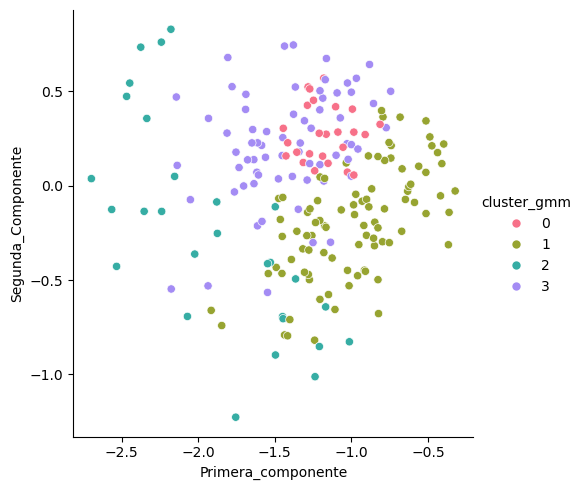

In [105]:
# Definir una paleta de colores para los 4 labels
palette = sns.color_palette("husl", 4)

# Crear el gráfico relacional con colores específicos para cada label
sns.relplot(data=cancer_Mgmm, x="Primera_componente", y="Segunda_Componente", hue="cluster_gmm", palette=palette)
plt.savefig('/Users/rafaelotero/Desktop/gmm')
plt.show()

In [68]:
from pyspark.ml.clustering import BisectingKMeans

# Creamos el modelo Bisecting K-means con el número deseado de clústeres (4 en este caso)
bikmeans = BisectingKMeans(k=4, featuresCol="scaledminMaxFeatures", predictionCol="cluster_bikm")

# Ajustamos el modelo a los datos escalados
bikmeansmodel = bikmeans.fit(cancer_Mspark_scaled)

# Realizamos la predicción de clústeres en los datos escalados
predictionsbikmeans = bikmeansmodel.transform(cancer_Mspark_scaled)

In [69]:
predictionsbikmeans.groupby('cluster_bikm').count().show()

+------------+-----+
|cluster_bikm|count|
+------------+-----+
|           1|   63|
|           3|   45|
|           2|   43|
|           0|   61|
+------------+-----+



In [70]:
# Evaluate clustering by computing Silhouette score
evaluatorbikmeans = ClusteringEvaluator(featuresCol='scaledminMaxFeatures', predictionCol='cluster_bikm')

silhouette = evaluatorbikmeans.evaluate(predictionsbikmeans)
print("Silhouette with squared euclidean distance = " + str(silhouette))

Silhouette with squared euclidean distance = 0.3468658387320388


In [71]:
#Añadimos nuestras predicciones de bikmeans al dataset customer que teníamos antes
cancer_Mbikmeanspredictions = predictionsbikmeans.toPandas()
cancer_Mbikmeans = pd.concat([cancer_Mpca, cancer_Mbikmeanspredictions[['cluster_bikm']]], axis=1)

In [72]:
cancer_Mbikmeans.head()

Primera_componente  Segunda_Componente  cluster_bikm
0           -2.176874           -0.547194             2
1           -1.000468            0.495853             1
2           -1.637240            0.138287             3
3           -1.755534           -1.226720             2
4           -1.445053            0.304396             3

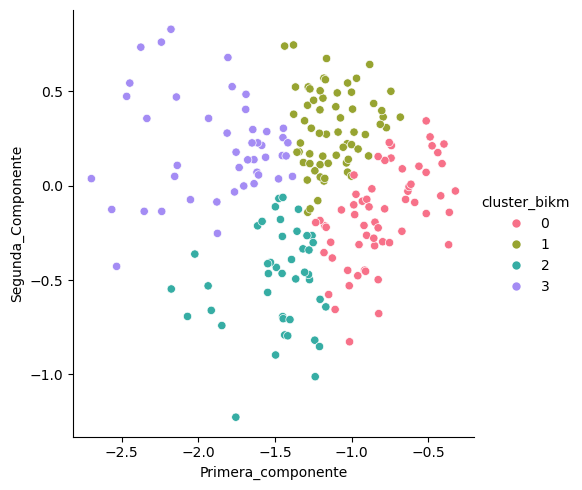

In [106]:
# Definir una paleta de colores para los 4 labels
palette = sns.color_palette("husl", 4)

# Crear el gráfico relacional con colores específicos para cada label
sns.relplot(data=cancer_Mbikmeans, x="Primera_componente", y="Segunda_Componente", hue="cluster_bikm", palette=palette)
plt.savefig('/Users/rafaelotero/Desktop/bikmeans')
plt.show()

VAMOS AHORA A INTENTAR ENTENDER LOS GRUPOS DE CLUSTERING CREADOS.

In [74]:
#Añadimos nuestras predicciones de kmeans al dataset customer que teníamos antes
cancer_M_cluster = pd.concat([cancer_Mp, cancer_Mkmeanspredictions[['cluster_km']]], axis=1)

In [75]:
cancer_M_cluster

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0          17.99      12.67125          122.80     1001.0         0.118400   
1          20.57      17.77000          132.90     1326.0         0.084740   
2          19.69      21.25000          130.00     1203.0         0.109600   
3          11.42      20.38000           77.58      386.1         0.136297   
4          20.29      14.34000          135.10     1297.0         0.100300   
..           ...           ...             ...        ...              ...   
207        20.92      25.09000          143.00     1347.0         0.109900   
208        21.56      22.39000          142.00     1479.0         0.111000   
209        20.13      28.25000          131.20     1261.0         0.097800   
210        16.60      28.08000          108.30      858.1         0.084550   
211        20.60      29.33000          140.10     1265.0         0.117800   

     compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0             0.26660        0.300100              0.14710         0.2419   
1             0.07864        0.086900              0.07017         0.1812   
2             0.15990        0.197400              0.12790         0.2069   
3             0.26660        0.241400              0.10520         0.2597   
4             0.13280        0.198000              0.10430         0.1809   
..                ...             ...                  ...            ...   
207           0.22360        0.317400              0.14740         0.2149   
208           0.11590        0.243900              0.13890         0.1726   
209           0.10340        0.144000              0.09791         0.1752   
210           0.10230        0.092510              0.05302         0.1590   
211           0.26660        0.343338              0.15200         0.2397   

     fractal_dimension_mean  cluster_km  
0                  0.078710           1  
1                  0.056670           0  
2                  0.059990           0  
3                  0.082791           3  
4                  0.058830           0  
..                      ...         ...  
207                0.068790           1  
208                0.056230           0  
209                0.055330           0  
210                0.056480           2  
211                0.070160           1  

[212 rows x 11 columns]

In [76]:
cancer_M_cluster.isna().sum()

radius_mean               0
texture_mean              0
perimeter_mean            0
area_mean                 0
smoothness_mean           0
compactness_mean          0
concavity_mean            0
concave points_mean       0
symmetry_mean             0
fractal_dimension_mean    0
cluster_km                0
dtype: int64

In [77]:
cancer_M_cluster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   radius_mean             212 non-null    float64
 1   texture_mean            212 non-null    float64
 2   perimeter_mean          212 non-null    float64
 3   area_mean               212 non-null    float64
 4   smoothness_mean         212 non-null    float64
 5   compactness_mean        212 non-null    float64
 6   concavity_mean          212 non-null    float64
 7   concave points_mean     212 non-null    float64
 8   symmetry_mean           212 non-null    float64
 9   fractal_dimension_mean  212 non-null    float64
 10  cluster_km              212 non-null    int32  
dtypes: float64(10), int32(1)
memory usage: 17.5 KB


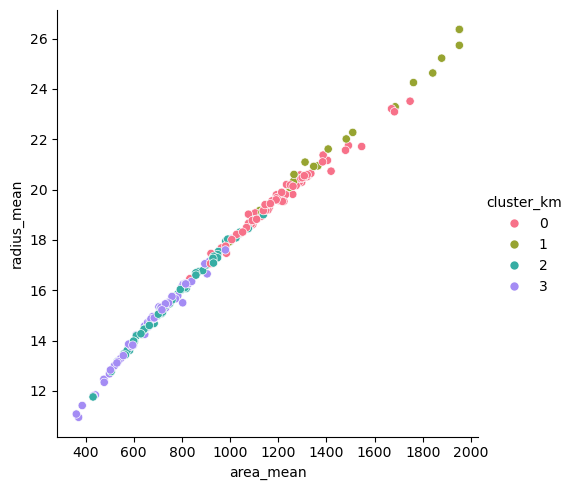

In [109]:
# Definir una paleta de colores para los 3 labels
palette = sns.color_palette("husl", 4)

# Crear el gráfico relacional con colores específicos para cada label
sns.relplot(data=cancer_M_cluster, x="area_mean", y="radius_mean", hue="cluster_km", palette=palette)
plt.savefig('/Users/rafaelotero/Desktop/radius_mean')
plt.show()

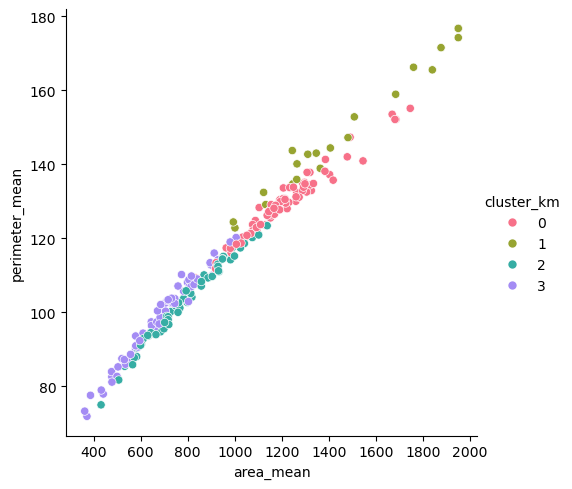

In [108]:
sns.relplot(data=cancer_M_cluster, x="area_mean", y="perimeter_mean", hue="cluster_km", palette=palette)
plt.savefig('/Users/rafaelotero/Desktop/perimeter_mean')
plt.show()

Hasta ahora podemos ver que:

Cluster 0: El segundo grupo de núcleos celulares más grande (de tamaño)

Cluster 1: Se trata del grupo de núcleos celulares más grande (de tamaño).

Cluster 2 y Cluster 3: Comparten el mismo tamaño.

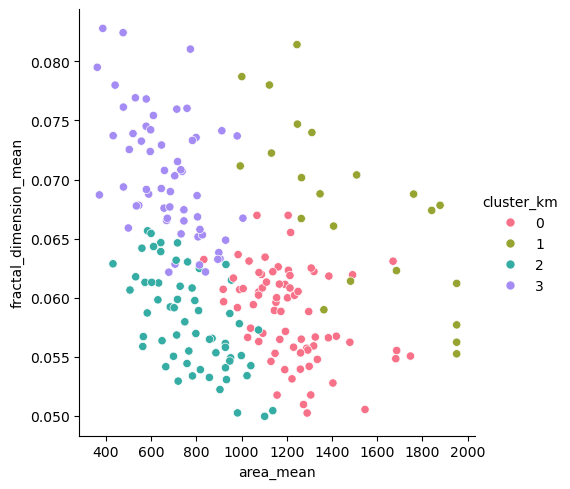

In [80]:
sns.relplot(data=cancer_M_cluster, x="area_mean", y="fractal_dimension_mean", hue="cluster_km", palette=palette)
plt.show()

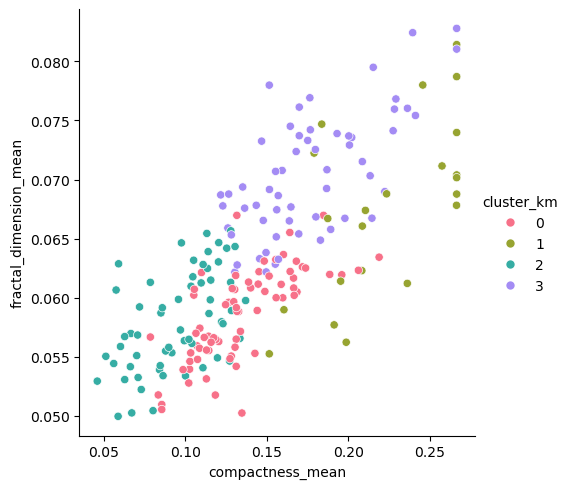

In [114]:
sns.relplot(data=cancer_M_cluster, x="compactness_mean", y="fractal_dimension_mean", hue="cluster_km", palette=palette)
plt.savefig('/Users/rafaelotero/Desktop/fractal_dimension_mean')
plt.show()

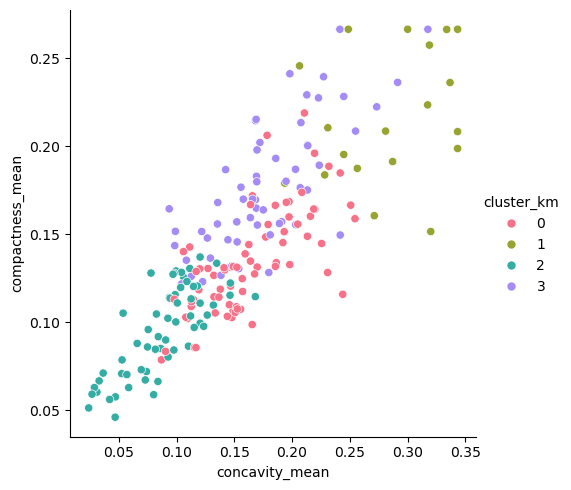

In [112]:
sns.relplot(data=cancer_M_cluster, x="concavity_mean", y="compactness_mean", hue="cluster_km", palette=palette)
plt.savefig('/Users/rafaelotero/Desktop/concavity_mean')
plt.show()

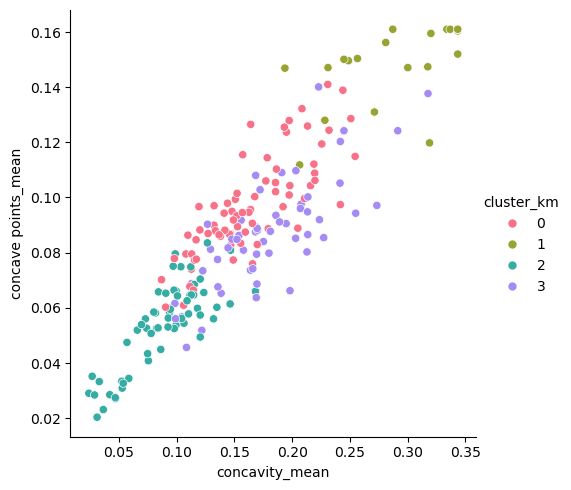

In [84]:
sns.relplot(data=cancer_M_cluster, x="concavity_mean", y="concave points_mean", hue="cluster_km", palette=palette)
plt.savefig('/Users/rafaelotero/Desktop/perimeter_mean')
plt.show()

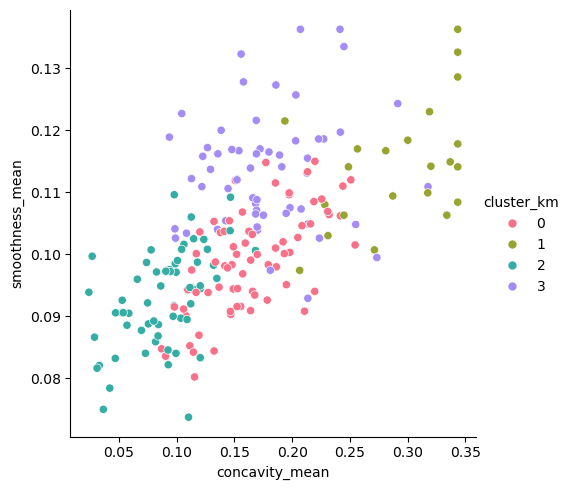

In [85]:
sns.relplot(data=cancer_M_cluster, x="concavity_mean", y="smoothness_mean", hue="cluster_km", palette=palette)
plt.show()

Mientras que el cluster más grande de tamaño (1) presenta las mayores características de suavidad, concavidad y tamaño. Los clústeres 2 y 3 que tenían el mismo tamaño tienen diferencias respecto a suavidad y concavidad, siendo el clúster 3 el que presenta más características de suavidad, concavidad y compacidad. Por otro lado, destacar el cluster 0, que presenta rangos intermedios en todas estas características mencionadas.

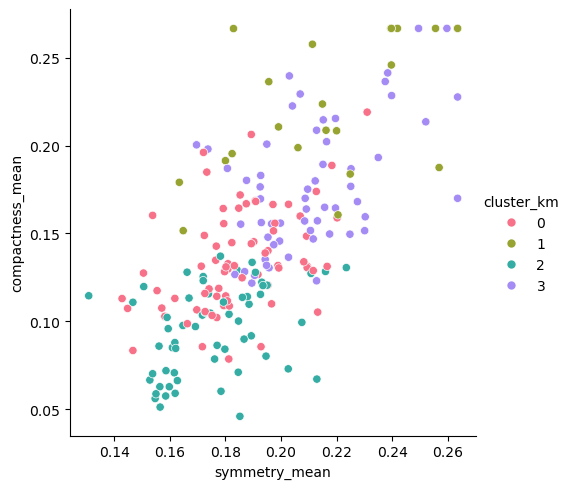

In [86]:
sns.relplot(data=cancer_M_cluster, x="symmetry_mean", y="compactness_mean", hue="cluster_km", palette=palette)
plt.show()

In [87]:
# Vamos a dividir nuestro Dataframe en los clústeres que hemos obtenido para hallar estadísticas.

cluster_0=cancer_M_cluster[cancer_M_cluster['cluster_km']==0].reset_index(drop=True)

cluster_1=cancer_M_cluster[cancer_M_cluster['cluster_km']==1].reset_index(drop=True)

cluster_2=cancer_M_cluster[cancer_M_cluster['cluster_km']==2].reset_index(drop=True)

cluster_3=cancer_M_cluster[cancer_M_cluster['cluster_km']==3].reset_index(drop=True)

In [88]:
#Recordemos el tamaño de nuestros clústeres.
kmeanspredictions.groupBy('cluster_km').count().show()

+----------+-----+
|cluster_km|count|
+----------+-----+
|         1|   22|
|         3|   58|
|         2|   60|
|         0|   72|
+----------+-----+



In [89]:
cluster_2.describe()

radius_mean  texture_mean  perimeter_mean    area_mean  \
count    60.000000     60.000000          60.000    60.000000   
mean     15.740000     21.180000         102.217   779.466667   
std       1.681428      3.078463          11.044   166.335214   
min      11.760000     15.050000          75.000   431.100000   
25%      14.442500     19.365000          94.180   642.650000   
50%      15.725000     21.140000         102.150   763.950000   
75%      17.210000     22.835000         111.300   928.425000   
max      19.000000     29.810000         123.400  1138.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count        60.000000         60.000000       60.000000            60.000000   
mean          0.092834          0.095507        0.088541             0.053590   
std           0.007841          0.025097        0.032715             0.015488   
min           0.073710          0.046050        0.023980             0.020310   
25%           0.088343          0.071780        0.068608             0.044505   
50%           0.093225          0.098580        0.093295             0.056055   
75%           0.098520          0.115475        0.111675             0.064622   
max           0.109600          0.137100        0.168200             0.083530   

       symmetry_mean  fractal_dimension_mean  cluster_km  
count      60.000000               60.000000        60.0  
mean        0.175557                0.058030         2.0  
std         0.018801                0.004140         0.0  
min         0.130800                0.049960         2.0  
25%         0.160625                0.054843         2.0  
50%         0.174250                0.057535         2.0  
75%         0.188050                0.061300         2.0  
max         0.223500                0.065660         2.0

In [90]:
cluster_1.describe()

radius_mean  texture_mean  perimeter_mean    area_mean  \
count    22.000000     22.000000       22.000000    22.000000   
mean     22.110341     22.725966      149.931136  1484.622727   
std       2.751602      3.698959       17.931702   329.550342   
min      17.910000     12.671250      122.800000   994.000000   
25%      20.220000     21.142500      136.650000  1251.250000   
50%      21.350000     22.920000      144.050000  1385.500000   
75%      24.535000     25.045000      166.025000  1821.000000   
max      26.362500     29.330000      176.695000  1951.425000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count        22.000000         22.000000       22.000000            22.000000   
mean          0.114482          0.222968        0.292547             0.149289   
std           0.009848          0.038929        0.049993             0.014355   
min           0.097400          0.151600        0.193700             0.111800   
25%           0.108100          0.192400        0.250650             0.147100   
50%           0.114150          0.217100        0.308750             0.151200   
75%           0.118250          0.266575        0.341703             0.161008   
max           0.136297          0.266600        0.343338             0.161008   

       symmetry_mean  fractal_dimension_mean  cluster_km  
count      22.000000               22.000000        22.0  
mean        0.217386                0.067697         1.0  
std         0.030795                0.007334         0.0  
min         0.163400                0.055250         1.0  
25%         0.196475                0.061623         1.0  
50%         0.218100                0.068295         1.0  
75%         0.239700                0.071968         1.0  
max         0.263550                0.081420         1.0

In [91]:
cluster_3.describe()

radius_mean  texture_mean  perimeter_mean    area_mean  \
count    58.000000     58.000000       58.000000    58.000000   
mean     14.661724     21.107478       97.757586   674.363793   
std       1.704987      3.576637       11.724208   156.771006   
min      10.950000     12.671250       71.900000   361.600000   
25%      13.477500     18.785000       89.030000   562.000000   
50%      14.885000     21.365000       99.470000   680.300000   
75%      15.772500     23.270000      106.975000   794.750000   
max      18.050000     30.421250      120.200000  1006.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count        58.000000         58.000000       58.000000            58.000000   
mean          0.113563          0.176803        0.177535             0.086931   
std           0.009390          0.036749        0.048327             0.019485   
min           0.092890          0.121800        0.093660             0.045620   
25%           0.106525          0.150175        0.145325             0.074992   
50%           0.113400          0.169850        0.169600             0.087020   
75%           0.118525          0.200700        0.207550             0.094665   
max           0.136297          0.266600        0.317600             0.140100   

       symmetry_mean  fractal_dimension_mean  cluster_km  
count      58.000000               58.000000        58.0  
mean        0.210921                0.070422         3.0  
std         0.021663                0.005209         0.0  
min         0.169600                0.062160         3.0  
25%         0.194825                0.066585         3.0  
50%         0.209350                0.069305         3.0  
75%         0.223500                0.073845         3.0  
max         0.263550                0.082791         3.0

In [92]:
cluster_0.describe()

radius_mean  texture_mean  perimeter_mean    area_mean  \
count    72.000000     72.000000       72.000000    72.000000   
mean     19.684028     21.852274      129.563889  1214.148611   
std       1.408359      3.684432        9.348244   181.972713   
min      16.460000     14.340000      109.300000   832.900000   
25%      18.742500     19.487500      123.425000  1091.000000   
50%      19.570000     21.245000      129.600000  1198.500000   
75%      20.472500     24.350000      133.950000  1297.500000   
max      23.510000     30.421250      155.100000  1747.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count        72.000000         72.000000       72.000000            72.000000   
mean          0.098904          0.134448        0.163929             0.096683   
std           0.008176          0.029368        0.041980             0.018252   
min           0.080200          0.078640        0.086900             0.060220   
25%           0.093727          0.112675        0.133225             0.086218   
50%           0.098895          0.131150        0.157050             0.094575   
75%           0.104675          0.155650        0.195600             0.106050   
max           0.115000          0.219000        0.254500             0.141000   

       symmetry_mean  fractal_dimension_mean  cluster_km  
count      72.000000               72.000000        72.0  
mean        0.184357                0.058582         0.0  
std         0.018961                0.003890         0.0  
min         0.142800                0.050240         0.0  
25%         0.173150                0.055682         0.0  
50%         0.181300                0.059285         0.0  
75%         0.196725                0.061703         0.0  
max         0.231000                0.066970         0.0

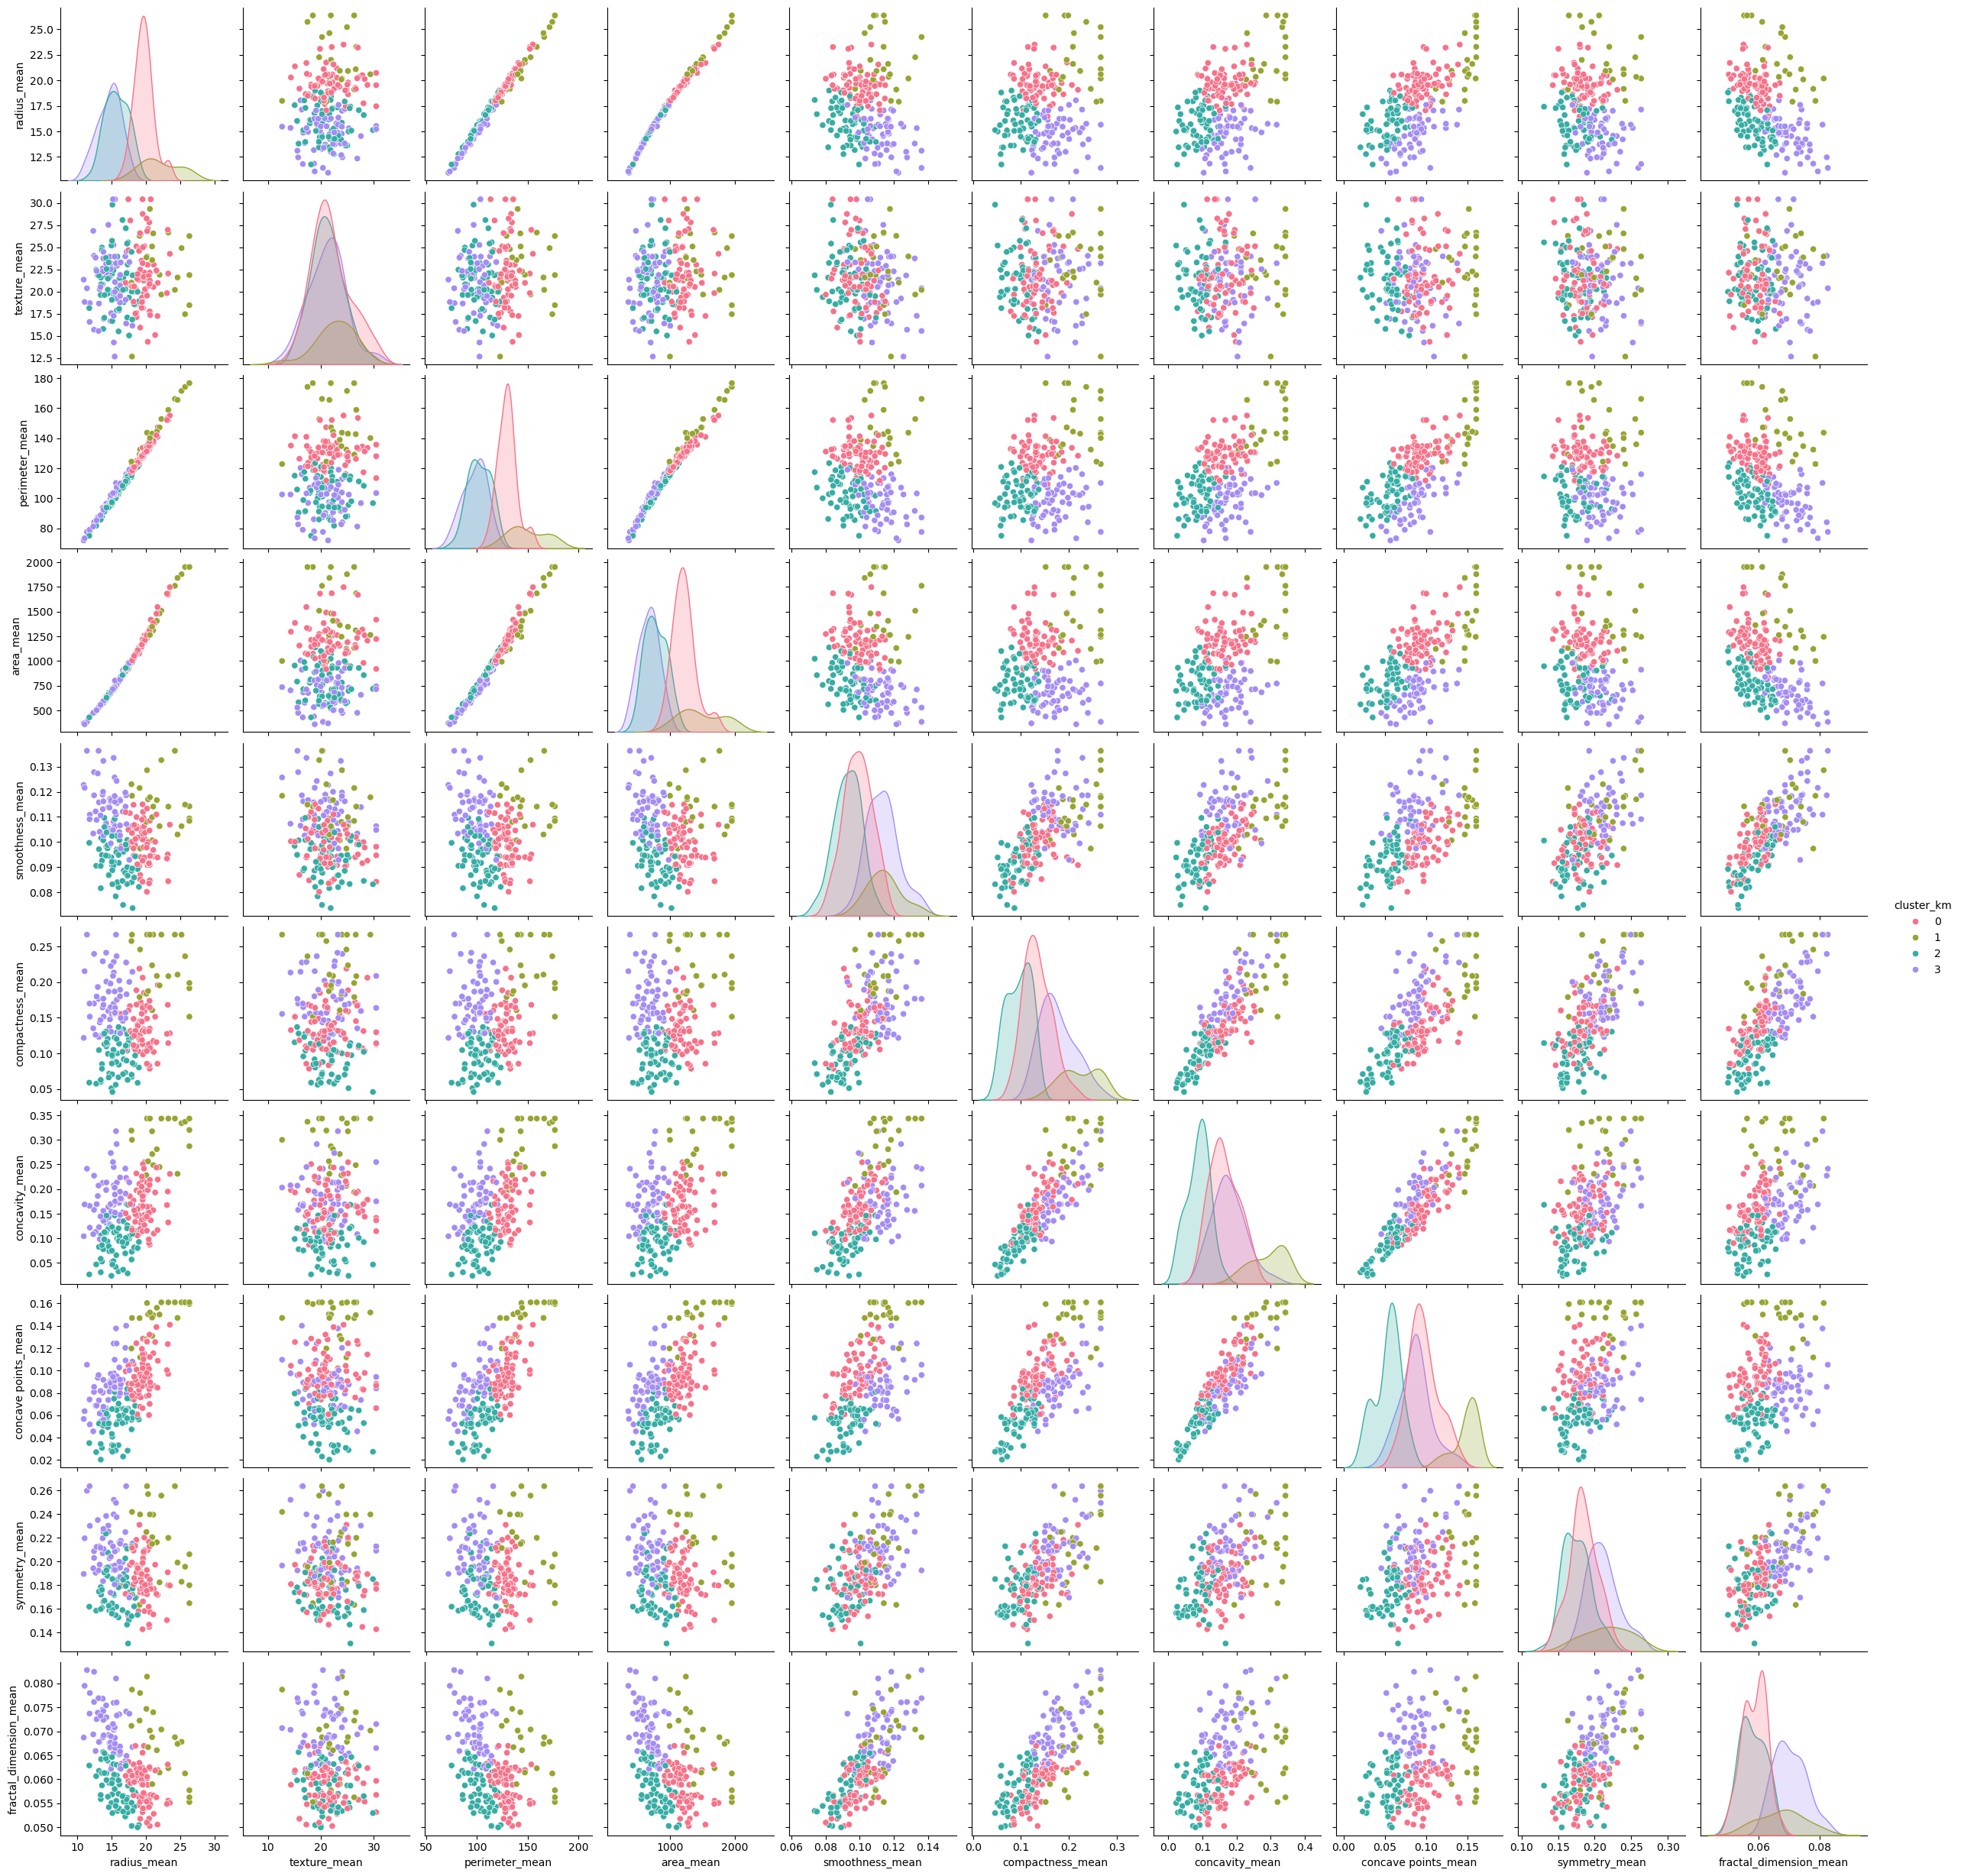

In [93]:
sns.pairplot(data=cancer_M_cluster, hue="cluster_km", palette=palette)
plt.show()

Podemos ver como el cluster 1 es el grupo con los rangos de valores más frecuentes en cada característica (se observa en los histogramas).

Básicamente la diferencia entre el cluster 2 y el cluster 3 es la compacidad, suavidad, concavidad, simetría y dimensión fractal. Presentando rangos más altos el cluster 3 que el 2.

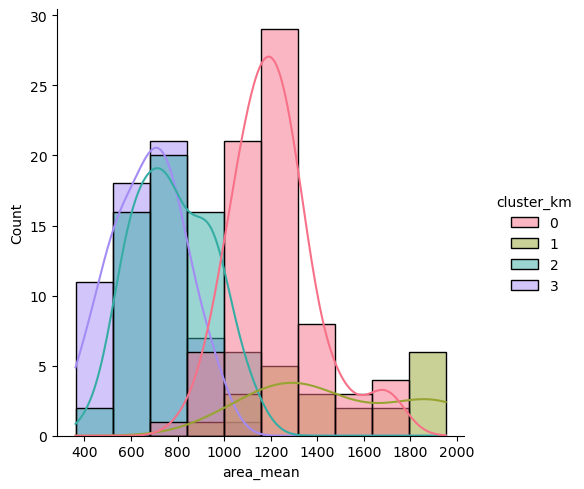

In [110]:
sns.displot(cancer_M_cluster, x="area_mean", hue="cluster_km", kde=True, palette=palette)
plt.savefig('/Users/rafaelotero/Desktop/tamañoscluster')
plt.show()

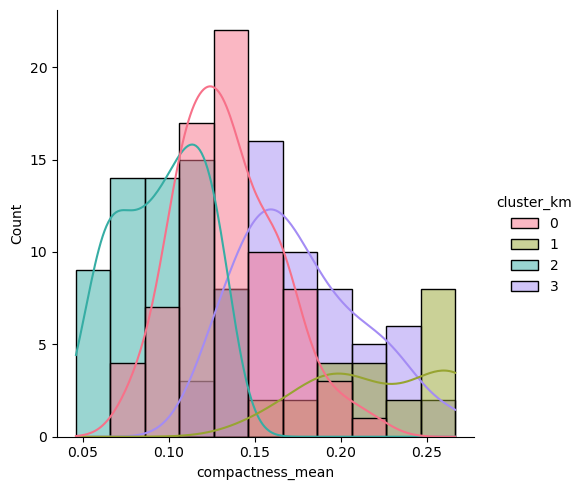

In [95]:
sns.displot(cancer_M_cluster, x="compactness_mean", hue="cluster_km", kde=True, palette=palette)
plt.show()

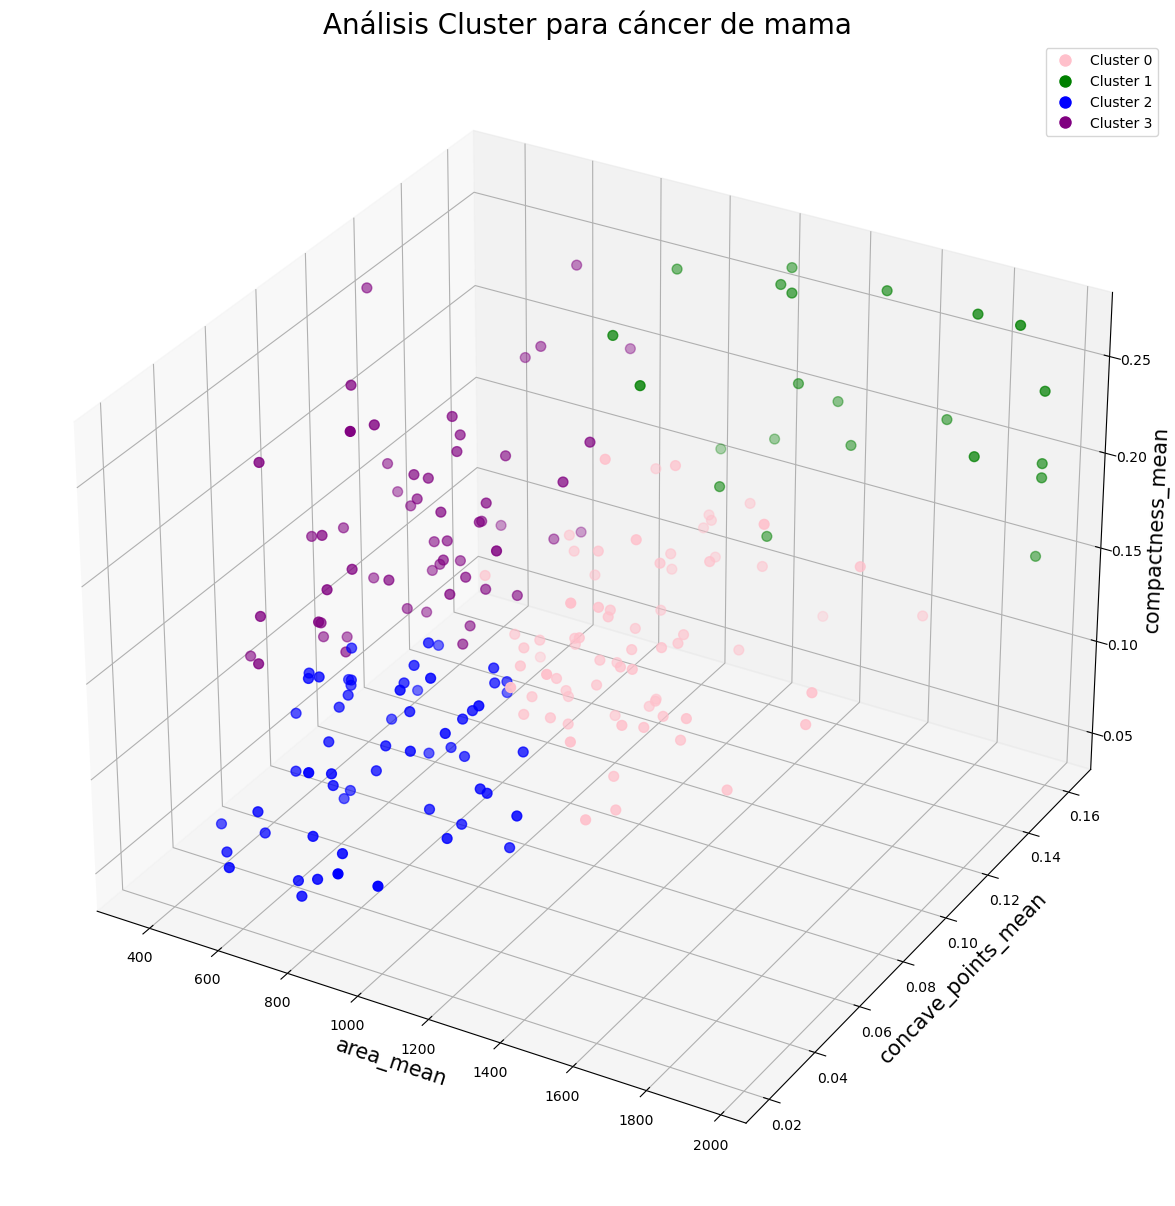

In [96]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('area_mean', fontsize=15)
ax.set_ylabel('concave_points_mean', fontsize=15)
ax.set_zlabel('compactness_mean', fontsize=15)
ax.set_title('Análisis Cluster para cáncer de mama', fontsize=20)


legend_labels = {'Cluster 0': 'pink', 'Cluster 1': 'green', 'Cluster 2': 'blue', 'Cluster 3' : 'purple'}
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=legend_labels[label], markersize=10, label=label) for label in legend_labels]

ax.legend(handles=legend_elements, loc='upper right')

colores = np.array(['pink', 'green', 'blue', 'purple'])
ax.scatter(cancer_M_cluster.area_mean, cancer_M_cluster['concave points_mean'], cancer_M_cluster.compactness_mean,
           c=colores[cancer_M_cluster.cluster_km], s=50)

plt.show()

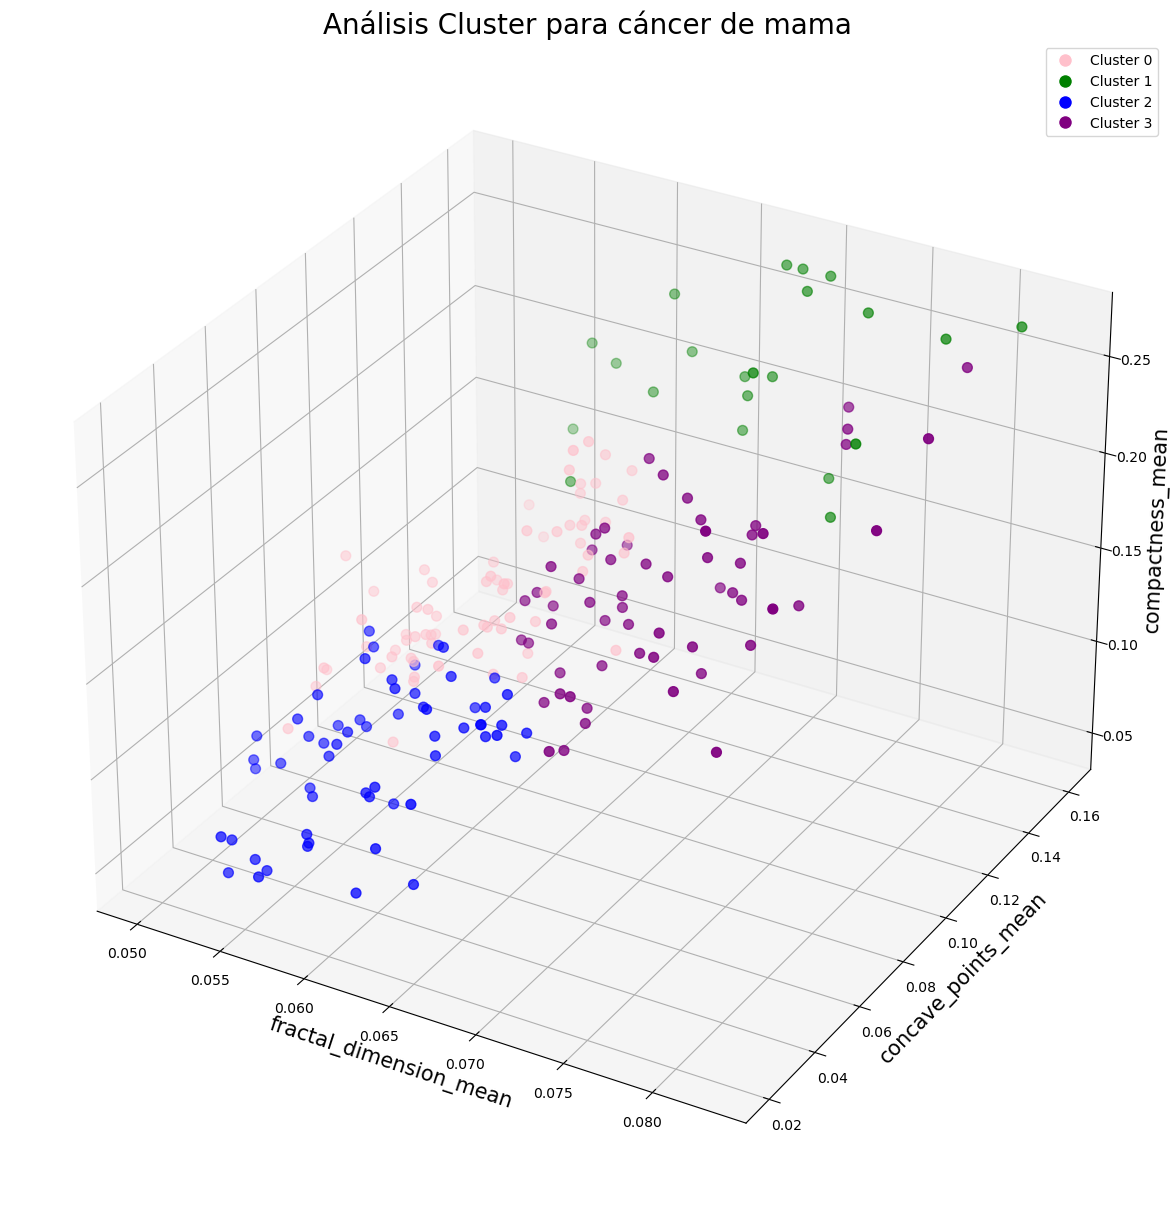

In [113]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('fractal_dimension_mean', fontsize=15)
ax.set_ylabel('concave_points_mean', fontsize=15)
ax.set_zlabel('compactness_mean', fontsize=15)
ax.set_title('Análisis Cluster para cáncer de mama', fontsize=20)


legend_labels = {'Cluster 0': 'pink', 'Cluster 1': 'green', 'Cluster 2': 'blue', 'Cluster 3' : 'purple'}
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=legend_labels[label], markersize=10, label=label) for label in legend_labels]

ax.legend(handles=legend_elements, loc='upper right')

colores = np.array(['pink', 'green', 'blue', 'purple'])
ax.scatter(cancer_M_cluster.fractal_dimension_mean, cancer_M_cluster['concave points_mean'], cancer_M_cluster.compactness_mean,
           c=colores[cancer_M_cluster.cluster_km], s=50)

plt.show()